In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


def count_frequencies(annotations):
    counts = np.bincount(annotations)
    counts = np.pad(
        counts, (0, 7 - len(counts)), "constant"
    )  # Preenche com zeros as classes ausentes
    return counts


def extract_annotations(file_path):
    with h5py.File(file_path, "r") as hf:
        annotations_group = hf["annotations"]
        annotations = [ann[()].flatten() for ann in annotations_group.values()]
    return np.concatenate(annotations)


import matplotlib.pyplot as plt


def plot_histogram(classes, counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, alpha=0.5, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Frequência")
    plt.show()

In [12]:
!pip install tabulate

In [15]:
import os


def main(path):
    files = [
        os.path.join(path, f)
        for f in os.listdir(path)
        if f.endswith("feature.h5") and os.path.isfile(os.path.join(path, f))
    ]
    count_total = []

    for file in files:
        if "HEAR_Test" in file:
            continue
        annotations = extract_annotations(file)
        counts = count_frequencies(annotations)
        count_total.append(counts[:4])
        desired_classes = ["(nothing)", "scream", "Violência Física", "gunshot"]
        plot_histogram(
            desired_classes, counts[:4], f"Histogram for {os.path.basename(file)}"
        )
    plot_histogram(desired_classes, sum(count_total), f"Histogram Total")

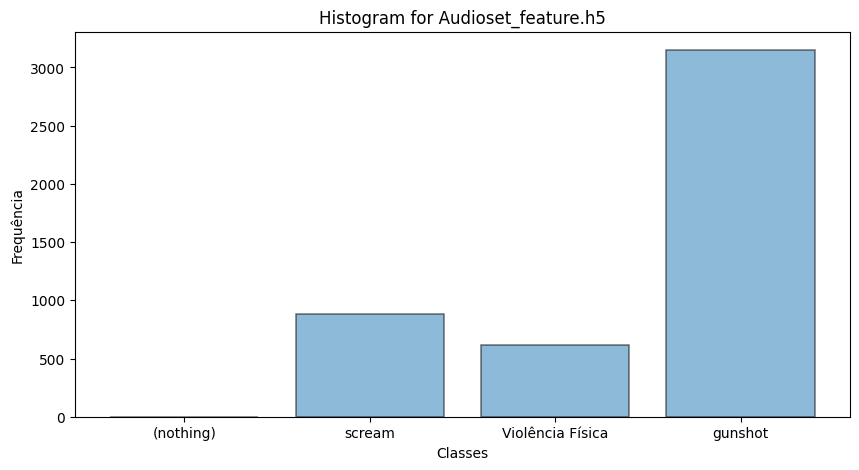

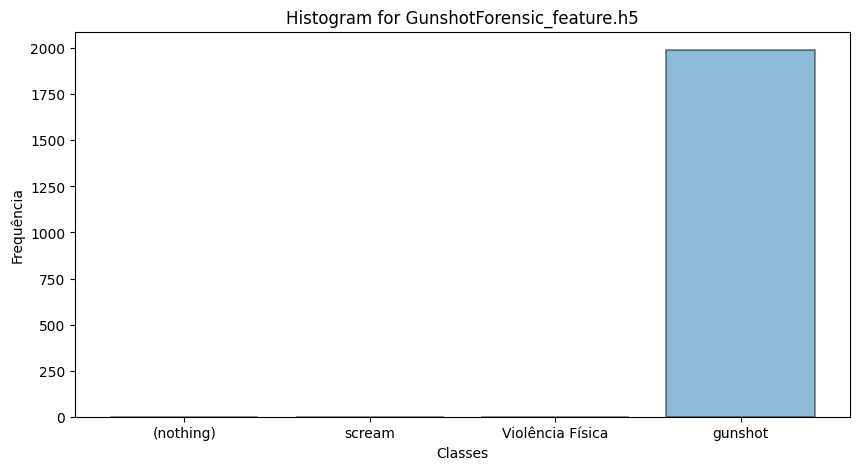

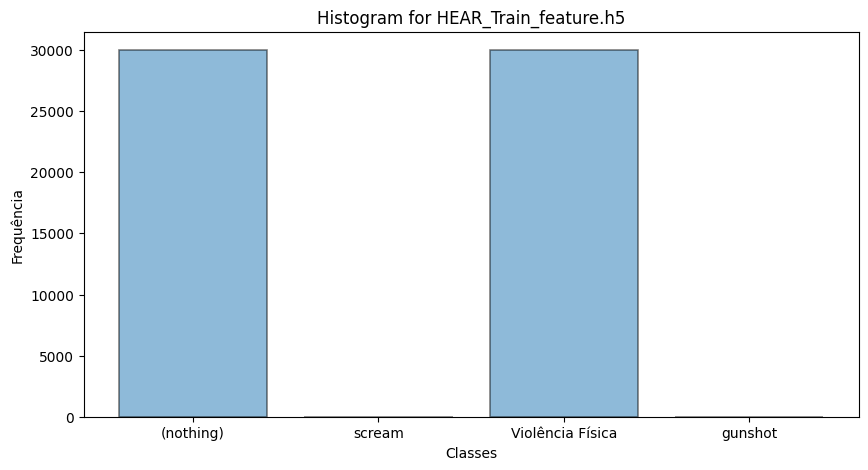

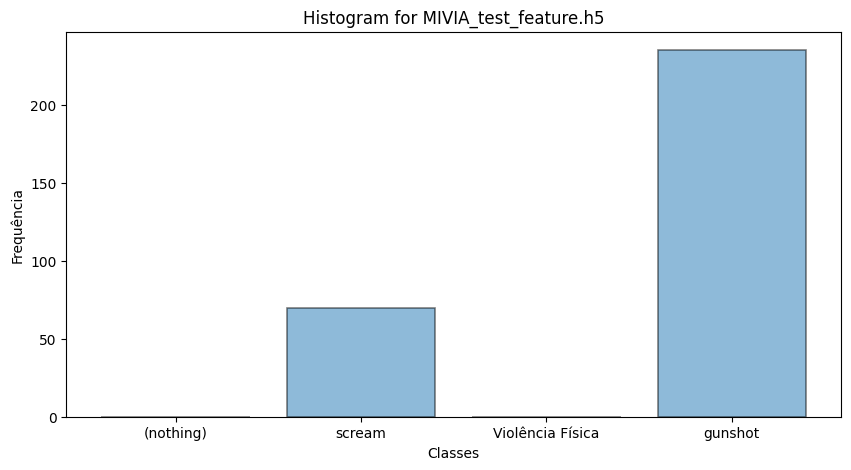

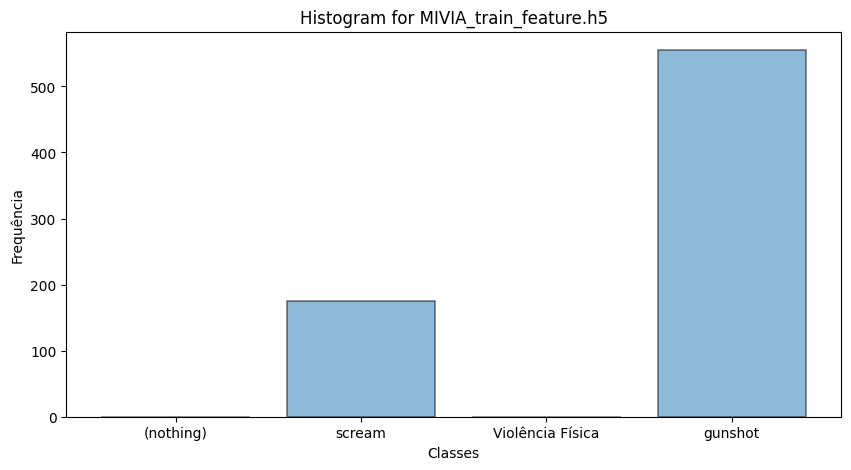

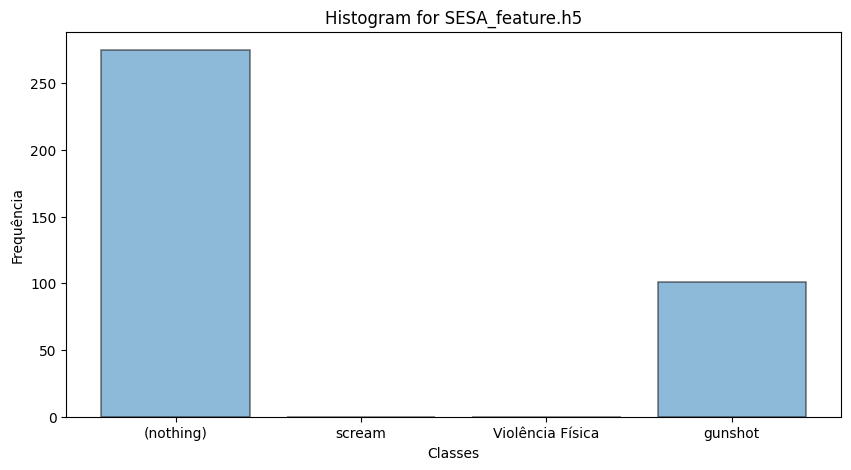

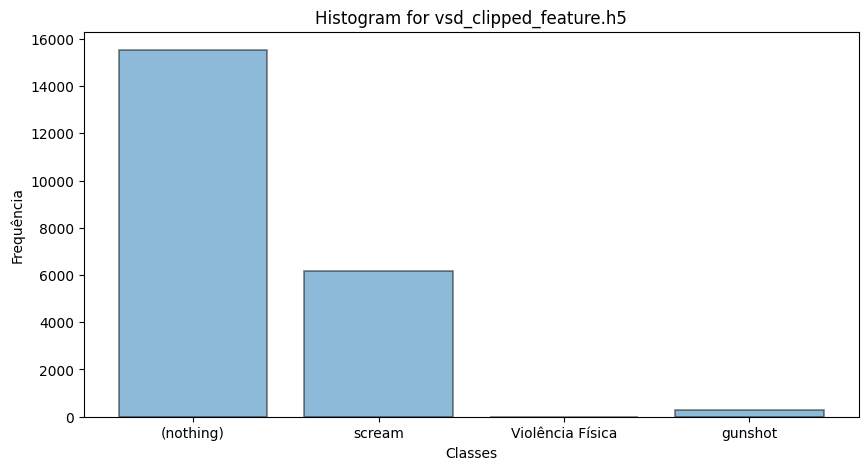

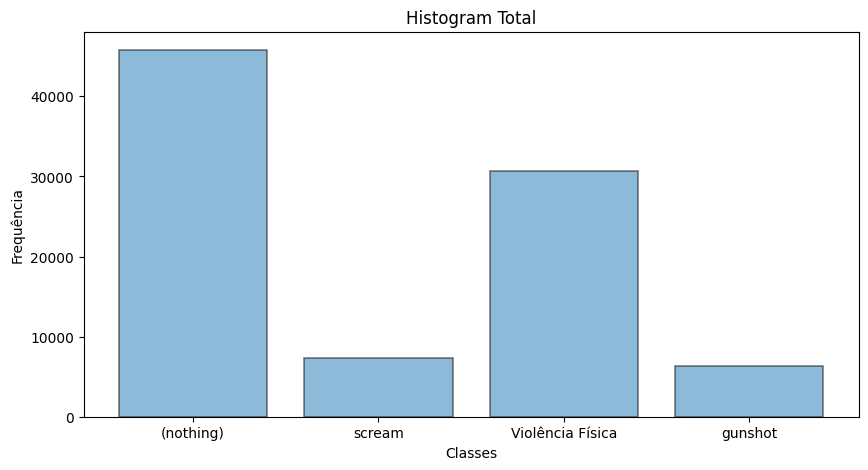

In [16]:
path = "../h5_files"  # substitua pelo caminho do diretório com os arquivos h5
main(path)

In [17]:
import os
from tabulate import tabulate


def main_tabulate(path):
    files = [
        os.path.join(path, f)
        for f in os.listdir(path)
        if f.endswith("feature.h5") and os.path.isfile(os.path.join(path, f))
    ]
    data = []

    for file in files:
        if "HEAR_Test" in file:
            continue
        annotations = extract_annotations(file)
        counts = count_frequencies(annotations)
        counts = counts[:4]  # Considerando apenas as primeiras 4 classes
        class_names = ["(nothing)", "scream", "Violência Física", "gunshot"]
        example_counts = counts.tolist()
        row = [os.path.basename(file)] + example_counts
        data.append(row)

    table = tabulate(
        data,
        headers=["Dicionário", "Classe 1", "Classe 2", "Classe 3", "Classe 4"],
        tablefmt="latex",
    )
    print(table)


path = "../h5_files"  # substitua pelo caminho do diretório com os arquivos h5
main_tabulate(path)

\begin{tabular}{lrrrr}
\hline
 Dicionário                 &   Classe 1 &   Classe 2 &   Classe 3 &   Classe 4 \\
\hline
 Audioset\_feature.h5        &          0 &        883 &        620 &       3149 \\
 GunshotForensic\_feature.h5 &          0 &          0 &          0 &       1990 \\
 HEAR\_Train\_feature.h5      &      29974 &          0 &      30000 &          0 \\
 MIVIA\_test\_feature.h5      &          0 &         70 &          0 &        235 \\
 MIVIA\_train\_feature.h5     &          0 &        175 &          0 &        555 \\
 SESA\_feature.h5            &        275 &          0 &          0 &        101 \\
 vsd\_clipped\_feature.h5     &      15523 &       6158 &          0 &        265 \\
\hline
\end{tabular}


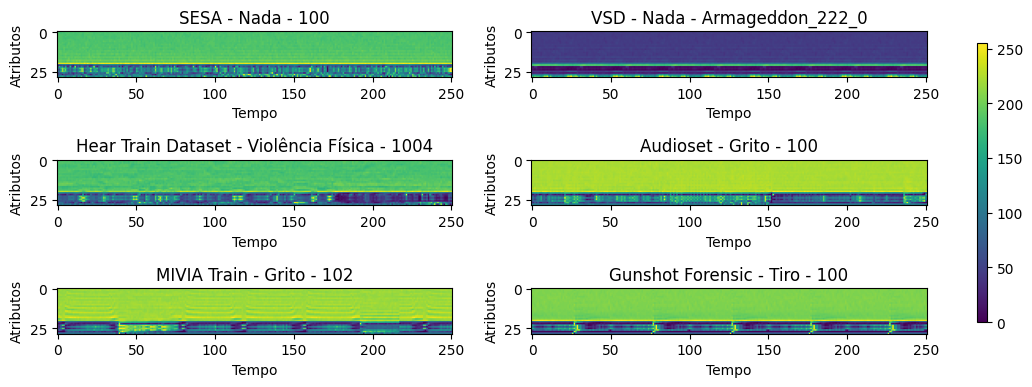

In [76]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

path = "../h5_files"
file_info = [
    {
        "file_name": "SESA_feature.h5",
        "dataset_name": "100",
        "classe": "Nada",
        "origin_dataset": "SESA",
    },
    {
        "file_name": "vsd_clipped_feature.h5",
        "dataset_name": "Armageddon_222_0",
        "classe": "Nada",
        "origin_dataset": "VSD",
    },
    {
        "file_name": "HEAR_Train_feature.h5",
        "dataset_name": "1004",
        "classe": "Violência Física",
        "origin_dataset": "Hear Train Dataset",
    },
    {
        "file_name": "Audioset_feature.h5",
        "dataset_name": "100",
        "classe": "Grito",
        "origin_dataset": "Audioset",
    },
    {
        "file_name": "MIVIA_train_feature.h5",
        "dataset_name": "102",
        "classe": "Grito",
        "origin_dataset": "MIVIA Train",
    },
    {
        "file_name": "GunshotForensic_feature.h5",
        "dataset_name": "100",
        "classe": "Tiro",
        "origin_dataset": "Gunshot Forensic",
    },
]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 5))

for i, info in enumerate(file_info):
    file_path = f"{path}/{info['file_name']}"
    dataset_name = info["dataset_name"]
    classe = info["classe"]
    origin_dataset = info["origin_dataset"]

    with h5py.File(file_path, "r") as f:
        features = f["features"][dataset_name][()]

    flipped_features = np.flipud(features.T)  # Aplica o flip vertical nos dados

    ax = axs[i // 2, i % 2]
    im = ax.imshow(flipped_features, cmap="viridis")
    ax.set_title(f"{origin_dataset} - {classe} - {dataset_name}")
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Atributos")

# Adiciona uma única colorbar e ajusta sua posição e tamanho
cbar = fig.colorbar(im, ax=axs, fraction=0.01, pad=0.04, aspect=30)
cbar.ax.yaxis.set_ticks_position("right")  # Move os ticks da colorbar para a direita

plt.subplots_adjust(
    hspace=0.0, wspace=0.2, right=0.85
)  # Ajusta o espaçamento vertical e horizontal entre os gráficos e a margem direita
plt.savefig("features_example.png", bbox_inches="tight")